In [1]:
# FAA Web Scaping Project
import csv
import requests
import pandas as pd
import numpy as np
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gdp
%matplotlib inline

In [3]:
url = 'https://tfr.faa.gov/tfr2/list.html'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [3]:
type(soup)

bs4.BeautifulSoup

In [4]:
title = soup.title
print(title)

<title>Federal Aviation Administration - Graphic TFR's</title>


In [5]:
text = soup.get_text()
print(soup.text)



Federal Aviation Administration - Graphic TFR's

 

#sidemenu {position:absolute; left:3; top:145; width:125; height:400; z-index:1;
    border-right-width: 1px;
	border-right-style: dashed;
	border-right-color: #666666;}
	
#content {position:absolute; left:0; top:150; width:100%; z-index:2;}	
	
body {
	background-repeat: repeat;
	background-color: #FFFFFF;
		FONT-SIZE: 12px; 
		FONT-FAMILY: Verdana, Geneva, Arial, Helvetica, sans-serif 
	color: #000000;
	line-height: 110%;
    }

.bodyText {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	color: #000000;
	line-height: 110%;

}
.bodyTextLink {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	color: #660000;
	line-height: normal;

}

.bodyTextLink A:link {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	color: #660000;
	line-height: normal;

}

.bodyTextLink A:visited {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	color: #660000;
	line-height: normal;

}

.foote

In [6]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Federal Aviation Administration - Graphic TFR's
  </title>
  <!--- The following code tells this page where to locate the stylesheet that controls the page's font and other attributes. If the stylesheet location changes, be sure to change the "href" below. --->
  <style>
   #sidemenu {position:absolute; left:3; top:145; width:125; height:400; z-index:1;
    border-right-width: 1px;
	border-right-style: dashed;
	border-right-color: #666666;}
	
#content {position:absolute; left:0; top:150; width:100%; z-index:2;}	
	
body {
	background-repeat: repeat;
	background-color: #FFFFFF;
		FONT-SIZE: 12px; 
		FONT-FAMILY: Verdana, Geneva, Arial, Helvetica, sans-serif 
	color: #000000;
	line-height: 110%;
    }

.bodyText {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	color: #000000;
	line-height: 110%;

}
.bodyTextLink {
	font-family: Arial, Helvetica, sans-serif;
	font-size: x-small;
	

In [20]:
rows = soup.find_all('tr')[11:83]
#rows_select = rows[11:83]
#print(rows_select)
print(rows)

[<tr bgcolor="ffffff" height="40" valign="top">
<td align="left" bgcolor="ffffcc" valign="top">
<a href="../save_pages/detail_9_4525.html">07/01/2019</a>
<!--        19:41 
-->
</td>
<td align="left" valign="top">
<!--  Bugzilla #7969 add font and underline to NOTAM ID -->
<a href="../save_pages/detail_9_4525.html"><font color="blue"><u>9/4525</u></font></a>
</td>
<td align="center" valign="top">
<a href="../save_pages/detail_9_4525.html">ZLA</a>
</td>
<td align="center" valign="top">
<a href="../save_pages/detail_9_4525.html">CA</a>
</td>
<td align="left" valign="top">
<a href="../save_pages/detail_9_4525.html">SECURITY</a>
</td>
<td align="left" valign="top">
<a href="../save_pages/detail_9_4525.html">Point Mugu NAS, CA, Wednesday, July 03, 2019 through Wednesday, July 03, 2019 Local
<font color="red"><b> New </b></font> </a>
</td>
<td align="left" bgcolor="#FFFFFF" valign="top">
<!--  Bugzilla #7969 change target of zoom -->
<!-- a href = "/tfr_map_ims/html/index.html"><img alt="zoo

In [21]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td align="left" bgcolor="ffffcc" valign="top">
<a href="../save_pages/detail_9_2934.html">01/26/2009</a>
<!--        22:13 
-->
</td>, <td align="left" valign="top">
<!--  Bugzilla #7969 add font and underline to NOTAM ID -->
<a href="../save_pages/detail_9_2934.html"><font color="blue"><u>9/2934</u></font></a>
</td>, <td align="center" valign="top">
<a href="../save_pages/detail_9_2934.html">ZFW</a>
</td>, <td align="center" valign="top">
<a href="../save_pages/detail_9_2934.html">TX</a>
</td>, <td align="left" valign="top">
<a href="../save_pages/detail_9_2934.html">VIP</a>
</td>, <td align="left" valign="top">
<a href="../save_pages/detail_9_2934.html">Dallas, TX
</a>
</td>, <td align="left" bgcolor="#FFFFFF" valign="top">
<!--  Bugzilla #7969 change target of zoom -->
<!-- a href = "/tfr_map_ims/html/index.html"><img alt="zoom to 9/2934" border="0" src="//img/zoom.gif"></a-->
<a href="/tfr_map_ims/html/ew/scale2/tile_2_2.html"><img alt="zoom to 9/2934" border="0" src="./img/zoom.

bs4.element.ResultSet

In [22]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)

[
01/26/2009

, 

9/2934
, 
ZFW
, 
TX
, 
VIP
, 
Dallas, TX

, 



]


In [23]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[
01/26/2009
<!--        22:13 
-->
, 

9/2934
, 
ZFW
, 
TX
, 
VIP
, 
Dallas, TX

, 



]


str

In [24]:
df = pd.DataFrame(list_rows)
df.head()

,0
0,"[\n07/01/2019\n<!-- 19:41 \r\n-->\n, \n..."
1,"[\n07/01/2019\n<!-- 18:17 \r\n-->\n, \n..."
2,"[\n07/01/2019\n<!-- 15:15 \r\n-->\n, \n..."
3,"[\n07/01/2019\n<!-- 14:26 \r\n-->\n, \n..."
4,"[\n07/01/2019\n<!-- 14:26 \r\n-->\n, \n..."


In [25]:
df1 = df[0].str.split(',', expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[\n07/01/2019\n<!-- 19:41 \r\n-->\n,\n\n9/4525\n,\nZLA\n,\nCA\n,\nSECURITY\n,\nPoint Mugu NAS,CA,Wednesday,July 03,2019 through Wednesday,July 03,2019 Local\r\n New \n,\n\n\n\n],None
1,[\n07/01/2019\n<!-- 18:17 \r\n-->\n,\n\n9/4482\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,\n27 NM ENE OF DOUGLAS,AZ,Monday,July 01,2019 through Tuesday,July 02,2019 UTC\r\n New \n,\n\n\n\n],None
2,[\n07/01/2019\n<!-- 15:15 \r\n-->\n,\n\n9/4287\n,\nZAB\n,\nNM\n,\nHAZARDS\n,\n40 NE OF SILVER CITY,NM,Monday,July 01,2019 through Thursday,August 01,2019 UTC\r\n New \n,\n\n\n\n],None
3,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4265\n,\nZMA\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...,FL,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None
4,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4254\n,\nZJX\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...,FL,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None
5,[\n07/01/2019\n<!-- 13:31 \r\n-->\n,\n\n9/4241\n,\nZMP\n,\nMN\n,\nHAZARDS\n,\nKEEWATIN,MN,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None
6,[\n07/01/2019\n<!-- 02:17 \r\n-->\n,\n\n9/4169\n,\nZLA\n,\nCA\n,\nSECURITY\n,\nPoint Mugu NAS,CA,Tuesday,July 02,2019 through Tuesday,July 02,2019 Local\r\n New \n,\n\n\n\n],None
7,[\n07/01/2019\n<!-- 02:13 \r\n-->\n,\n\n9/4168\n,\nZBW\n,\nNH\n,\nVIP\n,\nManchester,NH,Tuesday,July 02,2019 Local\r\n New \n,\n\n\n\n],None,None,None
8,[\n07/01/2019\n<!-- 01:59 \r\n-->\n,\n\n9/4166\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,\n19 NM SW OF SAFFORD,AZ,Monday,July 01,2019 through Thursday,August 01,2019 UTC\r\n New \n,\n\n\n\n],None
9,[\n06/30/2019\n<!-- 20:20 \r\n-->\n,\n\n9/4151\n,\nZAN\n,\nAK\n,\nHAZARDS\n,\n10NM NORTH WEST OF FAIRBANKS INLT,AK,Sunday,June 30,2019 through Wednesday,July 31,2019 UTC\r\n\n,\n\n\n\n],None


In [26]:
df1['Description'] = df1[df1.columns[5:12]].apply(
    lambda x: ','.join(x.dropna()), axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Description
0,[\n07/01/2019\n<!-- 19:41 \r\n-->\n,\n\n9/4525\n,\nZLA\n,\nCA\n,\nSECURITY\n,\nPoint Mugu NAS,CA,Wednesday,July 03,2019 through Wednesday,July 03,2019 Local\r\n New \n,\n\n\n\n],None,"\nPoint Mugu NAS, CA, Wednesday, July 03, 201..."
1,[\n07/01/2019\n<!-- 18:17 \r\n-->\n,\n\n9/4482\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,\n27 NM ENE OF DOUGLAS,AZ,Monday,July 01,2019 through Tuesday,July 02,2019 UTC\r\n New \n,\n\n\n\n],None,"\n27 NM ENE OF DOUGLAS, AZ, Monday, July 01, ..."
2,[\n07/01/2019\n<!-- 15:15 \r\n-->\n,\n\n9/4287\n,\nZAB\n,\nNM\n,\nHAZARDS\n,\n40 NE OF SILVER CITY,NM,Monday,July 01,2019 through Thursday,August 01,2019 UTC\r\n New \n,\n\n\n\n],None,"\n40 NE OF SILVER CITY, NM, Monday, July 01, ..."
3,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4265\n,\nZMA\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...,FL,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
4,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4254\n,\nZJX\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...,FL,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
5,[\n07/01/2019\n<!-- 13:31 \r\n-->\n,\n\n9/4241\n,\nZMP\n,\nMN\n,\nHAZARDS\n,\nKEEWATIN,MN,Wednesday,July 03,2019 UTC\r\n New \n,\n\n\n\n],None,None,None,"\nKEEWATIN, MN, Wednesday, July 03, 2019 UTC\..."
6,[\n07/01/2019\n<!-- 02:17 \r\n-->\n,\n\n9/4169\n,\nZLA\n,\nCA\n,\nSECURITY\n,\nPoint Mugu NAS,CA,Tuesday,July 02,2019 through Tuesday,July 02,2019 Local\r\n New \n,\n\n\n\n],None,"\nPoint Mugu NAS, CA, Tuesday, July 02, 2019 ..."
7,[\n07/01/2019\n<!-- 02:13 \r\n-->\n,\n\n9/4168\n,\nZBW\n,\nNH\n,\nVIP\n,\nManchester,NH,Tuesday,July 02,2019 Local\r\n New \n,\n\n\n\n],None,None,None,"\nManchester, NH, Tuesday, July 02, 2019 Loca..."
8,[\n07/01/2019\n<!-- 01:59 \r\n-->\n,\n\n9/4166\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,\n19 NM SW OF SAFFORD,AZ,Monday,July 01,2019 through Thursday,August 01,2019 UTC\r\n New \n,\n\n\n\n],None,"\n19 NM SW OF SAFFORD, AZ, Monday, July 01, 2..."
9,[\n06/30/2019\n<!-- 20:20 \r\n-->\n,\n\n9/4151\n,\nZAN\n,\nAK\n,\nHAZARDS\n,\n10NM NORTH WEST OF FAIRBANKS INLT,AK,Sunday,June 30,2019 through Wednesday,July 31,2019 UTC\r\n\n,\n\n\n\n],None,"\n10NM NORTH WEST OF FAIRBANKS INLT, AK, Sund..."


In [27]:
labels_drop = [5,6,7,8,9,10,11,12,13]

df_drop = df1.drop(columns=labels_drop)
df_drop

,0,1,2,3,4,Description
0,[\n07/01/2019\n<!-- 19:41 \r\n-->\n,\n\n9/4525\n,\nZLA\n,\nCA\n,\nSECURITY\n,"\nPoint Mugu NAS, CA, Wednesday, July 03, 201..."
1,[\n07/01/2019\n<!-- 18:17 \r\n-->\n,\n\n9/4482\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,"\n27 NM ENE OF DOUGLAS, AZ, Monday, July 01, ..."
2,[\n07/01/2019\n<!-- 15:15 \r\n-->\n,\n\n9/4287\n,\nZAB\n,\nNM\n,\nHAZARDS\n,"\n40 NE OF SILVER CITY, NM, Monday, July 01, ..."
3,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4265\n,\nZMA\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
4,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4254\n,\nZJX\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
5,[\n07/01/2019\n<!-- 13:31 \r\n-->\n,\n\n9/4241\n,\nZMP\n,\nMN\n,\nHAZARDS\n,"\nKEEWATIN, MN, Wednesday, July 03, 2019 UTC\..."
6,[\n07/01/2019\n<!-- 02:17 \r\n-->\n,\n\n9/4169\n,\nZLA\n,\nCA\n,\nSECURITY\n,"\nPoint Mugu NAS, CA, Tuesday, July 02, 2019 ..."
7,[\n07/01/2019\n<!-- 02:13 \r\n-->\n,\n\n9/4168\n,\nZBW\n,\nNH\n,\nVIP\n,"\nManchester, NH, Tuesday, July 02, 2019 Loca..."
8,[\n07/01/2019\n<!-- 01:59 \r\n-->\n,\n\n9/4166\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,"\n19 NM SW OF SAFFORD, AZ, Monday, July 01, 2..."
9,[\n06/30/2019\n<!-- 20:20 \r\n-->\n,\n\n9/4151\n,\nZAN\n,\nAK\n,\nHAZARDS\n,"\n10NM NORTH WEST OF FAIRBANKS INLT, AK, Sund..."


In [28]:
col_labels = ['Date', 'NOTAM', 'Facility', 'State', 'Type', 'Description']
df_drop.columns = col_labels
df_drop

,Date,NOTAM,Facility,State,Type,Description
0,[\n07/01/2019\n<!-- 19:41 \r\n-->\n,\n\n9/4525\n,\nZLA\n,\nCA\n,\nSECURITY\n,"\nPoint Mugu NAS, CA, Wednesday, July 03, 201..."
1,[\n07/01/2019\n<!-- 18:17 \r\n-->\n,\n\n9/4482\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,"\n27 NM ENE OF DOUGLAS, AZ, Monday, July 01, ..."
2,[\n07/01/2019\n<!-- 15:15 \r\n-->\n,\n\n9/4287\n,\nZAB\n,\nNM\n,\nHAZARDS\n,"\n40 NE OF SILVER CITY, NM, Monday, July 01, ..."
3,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4265\n,\nZMA\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
4,[\n07/01/2019\n<!-- 14:26 \r\n-->\n,\n\n9/4254\n,\nZJX\n,\nFL\n,\nSPACE OPERATIONS\n,\nL..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTR...
5,[\n07/01/2019\n<!-- 13:31 \r\n-->\n,\n\n9/4241\n,\nZMP\n,\nMN\n,\nHAZARDS\n,"\nKEEWATIN, MN, Wednesday, July 03, 2019 UTC\..."
6,[\n07/01/2019\n<!-- 02:17 \r\n-->\n,\n\n9/4169\n,\nZLA\n,\nCA\n,\nSECURITY\n,"\nPoint Mugu NAS, CA, Tuesday, July 02, 2019 ..."
7,[\n07/01/2019\n<!-- 02:13 \r\n-->\n,\n\n9/4168\n,\nZBW\n,\nNH\n,\nVIP\n,"\nManchester, NH, Tuesday, July 02, 2019 Loca..."
8,[\n07/01/2019\n<!-- 01:59 \r\n-->\n,\n\n9/4166\n,\nZAB\n,\nAZ\n,\nHAZARDS\n,"\n19 NM SW OF SAFFORD, AZ, Monday, July 01, 2..."
9,[\n06/30/2019\n<!-- 20:20 \r\n-->\n,\n\n9/4151\n,\nZAN\n,\nAK\n,\nHAZARDS\n,"\n10NM NORTH WEST OF FAIRBANKS INLT, AK, Sund..."


In [29]:
df_final = df_drop
#for rows in df_final:
df_final['Date'] = df_final['Date'].str.strip('[').str.replace('\n', '').str.strip('\r\n-->\n').str.replace('<!--','')
# df_final['Column_Name'] = df_final['Column_Name'].str.strip('').str.strip('')

df_final['NOTAM'] = df_final['NOTAM'].str.strip('\n').str.replace('\n\n', '')
df_final['Facility'] = df_final['Facility'].str.replace('\n', '')
df_final['State'] = df_final['State'].str.replace('\n', '')
df_final['Type'] = df_final['Type'].str.replace('\n', '')
df_final['Description'] = df_final['Description'].str.replace('\n', '').str.strip(']').str.replace('\r', '')

df_final

,Date,NOTAM,Facility,State,Type,Description
0,07/01/2019 19:41,9/4525,ZLA,CA,SECURITY,"Point Mugu NAS, CA, Wednesday, July 03, 2019 ..."
1,07/01/2019 18:17,9/4482,ZAB,AZ,HAZARDS,"27 NM ENE OF DOUGLAS, AZ, Monday, July 01, 20..."
2,07/01/2019 15:15,9/4287,ZAB,NM,HAZARDS,"40 NE OF SILVER CITY, NM, Monday, July 01, 20..."
3,07/01/2019 14:26,9/4265,ZMA,FL,SPACE OPERATIONS,L..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTRIC...
4,07/01/2019 14:26,9/4254,ZJX,FL,SPACE OPERATIONS,L..AIRSPACE CAPE CANAVERAL.TEMPORARYT RESTRIC...
5,07/01/2019 13:31,9/4241,ZMP,MN,HAZARDS,"KEEWATIN, MN, Wednesday, July 03, 2019 UTC Ne..."
6,07/01/2019 02:17,9/4169,ZLA,CA,SECURITY,"Point Mugu NAS, CA, Tuesday, July 02, 2019 th..."
7,07/01/2019 02:13,9/4168,ZBW,NH,VIP,"Manchester, NH, Tuesday, July 02, 2019 Local ..."
8,07/01/2019 01:59,9/4166,ZAB,AZ,HAZARDS,"19 NM SW OF SAFFORD, AZ, Monday, July 01, 201..."
9,06/30/2019 20:20,9/4151,ZAN,AK,HAZARDS,"10NM NORTH WEST OF FAIRBANKS INLT, AK, Sunday..."


In [30]:
#df = pd.df_final
df_final.to_csv(r'/Users/travisvolpe/Desktop/ffa.csv')


In [31]:
#with open('faa.csv', 'a') as csv_file:
#    writer = csv.writer(csv_file)
#    writer.writerow(df1)

In [36]:
df_final.describe()

,Date,NOTAM,Facility,State,Type,Description
count,71,71,71,71,71,71
unique,67,71,19,24,6,67
top,06/27/2019 12:15,9/4151,ZAU,USA,SECURITY,"USA, Wednesday, October 12, 2016 UTC,"
freq,2,1,8,12,28,3


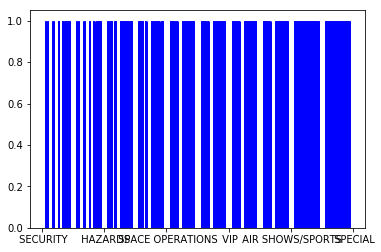

In [35]:
plt.hist(df_final['Type'],
        facecolor='peru',
        edgecolor='blue',
        bins=10,
        cumulative=True)

plt.show()